In [ ]:
#library tensorflow untuk modelling
import tensorflow as tf
from keras import layers, models

In [ ]:
#membuat folder baru
!mkdir Semangka
!mkdir Apel
!mkdir Anggur

In [ ]:
#install augmentor untuk memperbanyak image
!pip install Augmentor

In [ ]:
#augmentasi image
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=12, max_right_rotation=12)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

perbanyak("/content/Semangka", 500)
perbanyak("/content/Apel", 500)
perbanyak("/content/Anggur", 500)

Initialised with 3 image(s) found.
Output directory set to /content/Semangka/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7B9239307F70>: 100%|██████████| 500/500 [01:18<00:00,  6.39 Samples/s]


Initialised with 3 image(s) found.
Output directory set to /content/Apel/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7B92418C74F0>: 100%|██████████| 500/500 [01:36<00:00,  5.16 Samples/s]


Initialised with 3 image(s) found.
Output directory set to /content/Anggur/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7B9239304E50>: 100%|██████████| 500/500 [02:18<00:00,  3.62 Samples/s]


In [ ]:
import glob
import cv2
import random
import numpy as np

In [ ]:
x = []
y = []

for alamat_gambar in glob.glob("Semangka/*"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (224,224))/255
  x.append(gambar)
  y.append(0)

for alamat_gambar in glob.glob("Apel/*"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (224,224))/255
  x.append(gambar)
  y.append(1)

for alamat_gambar in glob.glob("Anggur/*"):
  gambar = cv2.imread(alamat_gambar)
  gambar = cv2.resize(gambar, (224,224))/255
  x.append(gambar)
  y.append(2)

z = list(zip(x,y))
random.shuffle(z)
x,y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

**Model**

In [ ]:
#arsitektur

def create_alexnet_model(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 2
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Layer 3
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 4
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 5
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation='softmax'))

    return model

# Buat model AlexNet
alexnet_model = create_alexnet_model(input_shape=(224, 224, 3), num_classes=3)

alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 54, 54, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 256)       1024      
 chNormalization)                                                
                                                        

In [ ]:
alexnet_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
history = alexnet_model.fit(x,y, batch_size=2, epochs=10, validation_split=0.2)

Epoch 1/10
604/604 [==============================] - 27s 23ms/step - loss: 16.5355 - accuracy: 0.8326 - val_loss: 29.1708 - val_accuracy: 0.9040
Epoch 2/10
604/604 [==============================] - 13s 22ms/step - loss: 25.5384 - accuracy: 0.9362 - val_loss: 347.4898 - val_accuracy: 0.7881
Epoch 3/10
604/604 [==============================] - 13s 22ms/step - loss: 10.3797 - accuracy: 0.9735 - val_loss: 3.1766 - val_accuracy: 0.9934
Epoch 4/10
604/604 [==============================] - 13s 22ms/step - loss: 7.3432 - accuracy: 0.9876 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
604/604 [==============================] - 14s 23ms/step - loss: 10.1255 - accuracy: 0.9892 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
604/604 [==============================] - 14s 22ms/step - loss: 15.0001 - accuracy: 0.9876 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
604/604 [==============================] - 13s 22ms/step - loss: 21.1318 - accuracy: 0.9859 - val_loss: 4

In [ ]:
import matplotlib.pyplot as plt

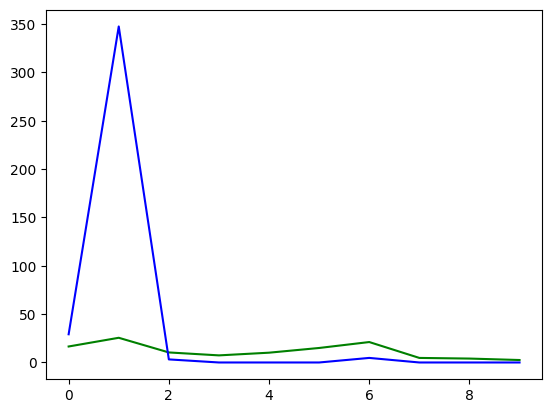

In [ ]:
y1 = history.history['loss']
y2 = history.history['val_loss']
plt.plot(range(len(y1)), y1, 'g',
         range(len(y2)), y2, 'b')

plt.show()

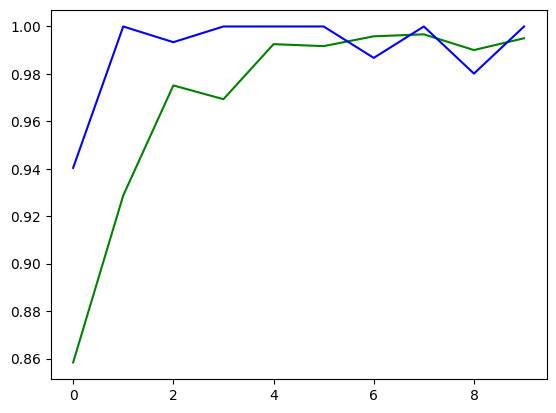

In [ ]:
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']
plt.plot(range(len(y1)), y1, 'g',
         range(len(y2)), y2, 'b')

plt.show()

In [ ]:
#prediksi gambar baru
img_baru = cv2.imread('image.jpeg')
img_baru = cv2.resize(img_baru, (224, 224))/255
x_test = []
x_test.append(img_baru)
x_test = np.array(x_test)
pred = alexnet_model.predict(x_test)

kamus = {0:"Semangka",
         1:"Apel",
         2:"Anggur"}


pred = np.argmax(pred, axis=1)
pred = [kamus[i] for i in pred]
print('Prediksi Gambar = ', pred[0])

1/1 [==============================] - 0s 28ms/step
Prediksi Gambar =  Anggur
